<a href="https://colab.research.google.com/github/nayse/ia-tca/blob/main/projeto_tca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.utils import save_img
from tensorflow.keras import layers, models

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Upload do Dataset: aneurismas rompidos e não rompidos

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.0)

aneurismas = '/content/drive/My Drive/Colab Notebooks/fotos'

train_generator = train_datagen.flow_from_directory(
    aneurismas,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary')

Found 12 images belonging to 2 classes.


# Upload dos parâmentros de Teste: imagens 28x28 e 48x48

In [ ]:
dimensoes = '/content/drive/My Drive/Colab Notebooks/dimensoes'

val_datagen = ImageDataGenerator(rescale=1/255.0)
val_generator = val_datagen.flow_from_directory(
    dimensoes,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=16,
    class_mode='binary')

Found 24 images belonging to 4 classes.


# Definição das camadas de entradas (Layer Input) usando Conv2D



In [ ]:

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48,48,3)))
model.add(layers.MaxPooling2D((2, 2))) #primeira camada de convolução

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #segunda camada de convolução

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #terceira camada de convolução

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) #quarta camada de convolução


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

# Plot do modelo de Camadas

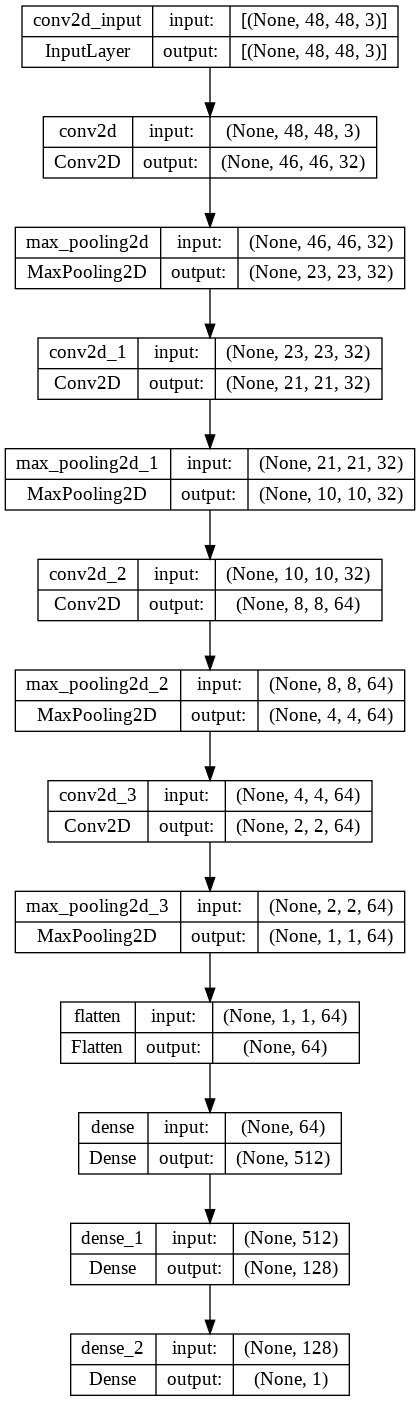

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
)

# Algoritmo Adam(otimizado)

In [ ]:
opt = tf.keras.optimizers.Adam(lr=1e-3)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
      train_generator,
      steps_per_epoch=np.ceil(1486 /32), 
      epochs=5,
      verbose=1,
      validation_data = val_generator,
      validation_steps=np.ceil(382 /16))

Epoch 1/5


InvalidArgumentError: ignored

# Testes 1

1/1 [==============================] - 0s 70ms/step
[[0.5008664]]
aneurisma rompido


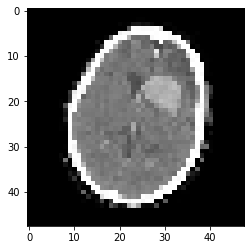

In [ ]:
#Imagem do Teste 1 obtida do site: https://radiopaedia.org/cases/cerebral-aneurysm-rupture
# carregadr imagem e testar o modelo
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste.jfif', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)

# Teste 2

1/1 [==============================] - 0s 49ms/step
[[0.49922246]]
aneurisma não rompido


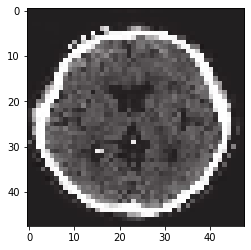

In [ ]:
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste2.jpg', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)

# Teste 3

In [ ]:
img = load_img('/content/drive/My Drive/Colab Notebooks/imagem_teste3.jpg', color_mode='rgb', target_size=(128,128))
img_array = img_to_array(img)/255.0 
x = np.expand_dims(img_array, 0)

out = model.predict(x)
print(out)
if out <0.5:
  print('aneurisma não rompido')
else:
   print('aneurisma rompido')

plt.imshow(img)